In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 



# Filtro de Primeira Ordem passa-baixa passivo

In [2]:
R = 2700
C = 10e-9 

In [3]:
## Valores medidos

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
     900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
     30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000, 600000, 700000, 800000, 900000]

v = [1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02,  
     1,  1,  1,  1,  1,  1, 0.98, 0.92, 0.86, 0.8, 0.74, 0.68, 0.64, 0.6, 0.56, 
     0.32, 0.22, 0.16, 0.128, 0.104, 0.09, 0.08, 0.07, 0.062, 0.0312, 0.0216, 
     0.0112, 0.0088, 0.0056, 0.0048, 0.0024, 0]

teta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 5, 5, 6, 7, 8, 17, 23, 31, 36, 
        42, 46, 50, 54, 54, 69, 76, 78, 82, 84, 85, 85, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87] 

## 01) Com os valores anotados na Tabela 1, construa o gráfico do módulo do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


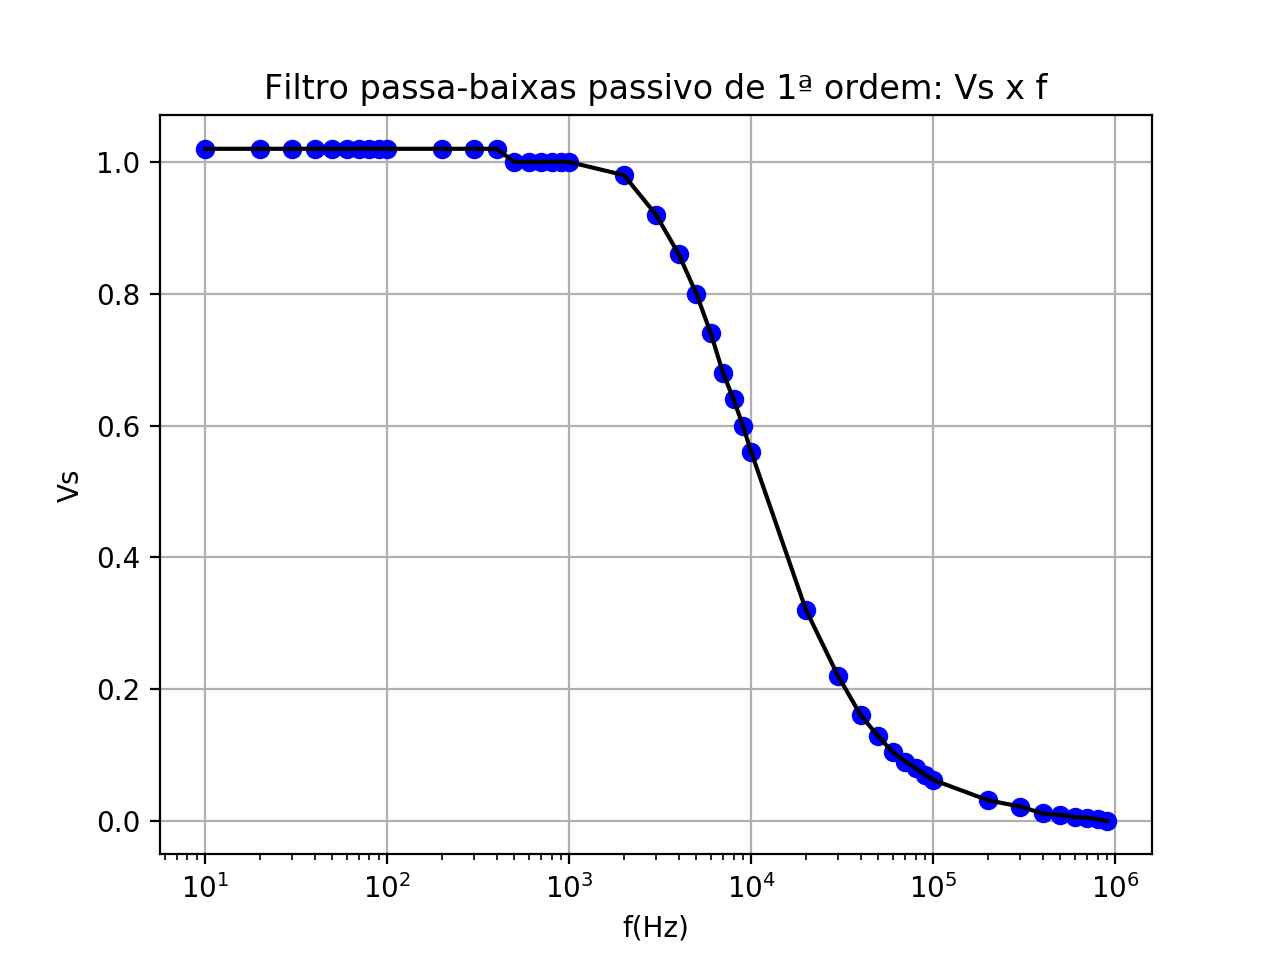

In [50]:
%matplotlib notebook

plt.figure()
plt.plot(f, v, 'bo', f, v, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 2) Com os valores anotados na Tabela 2, construa o gráfico do módulo da fase do filtro em função da frequência.

<IPython.core.display.Javascript object>


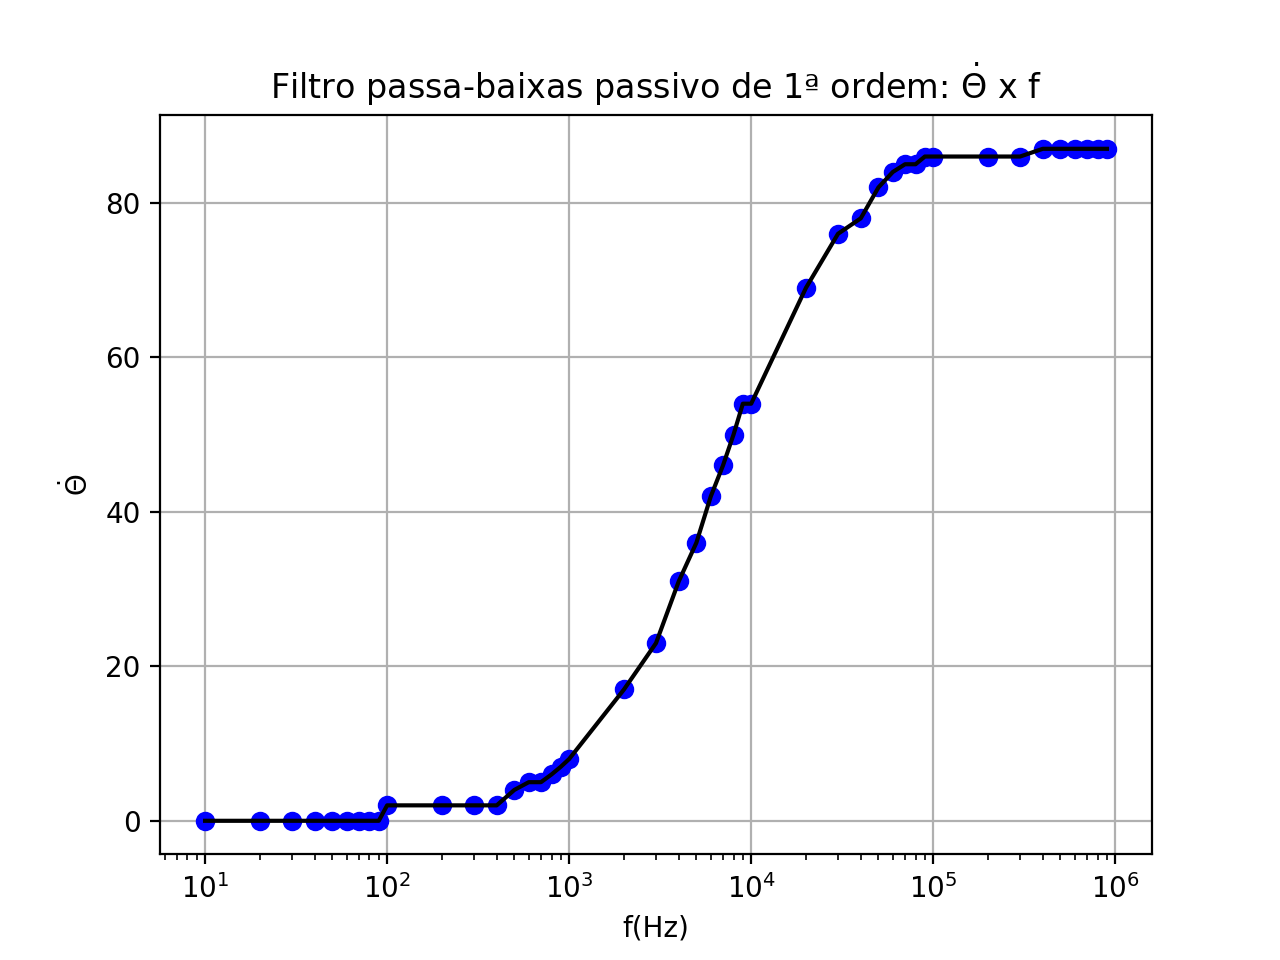

In [48]:
plt.figure()
plt.plot(f, teta, 'bo', f, teta, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")
plt.ylabel('$\dot{\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 3) Calcule a frequência de corte do filtro montado na Parte Prática e indique-a nos gráficos construídos nas questões 1 (a) e 3 (b). 

## a) 

<IPython.core.display.Javascript object>


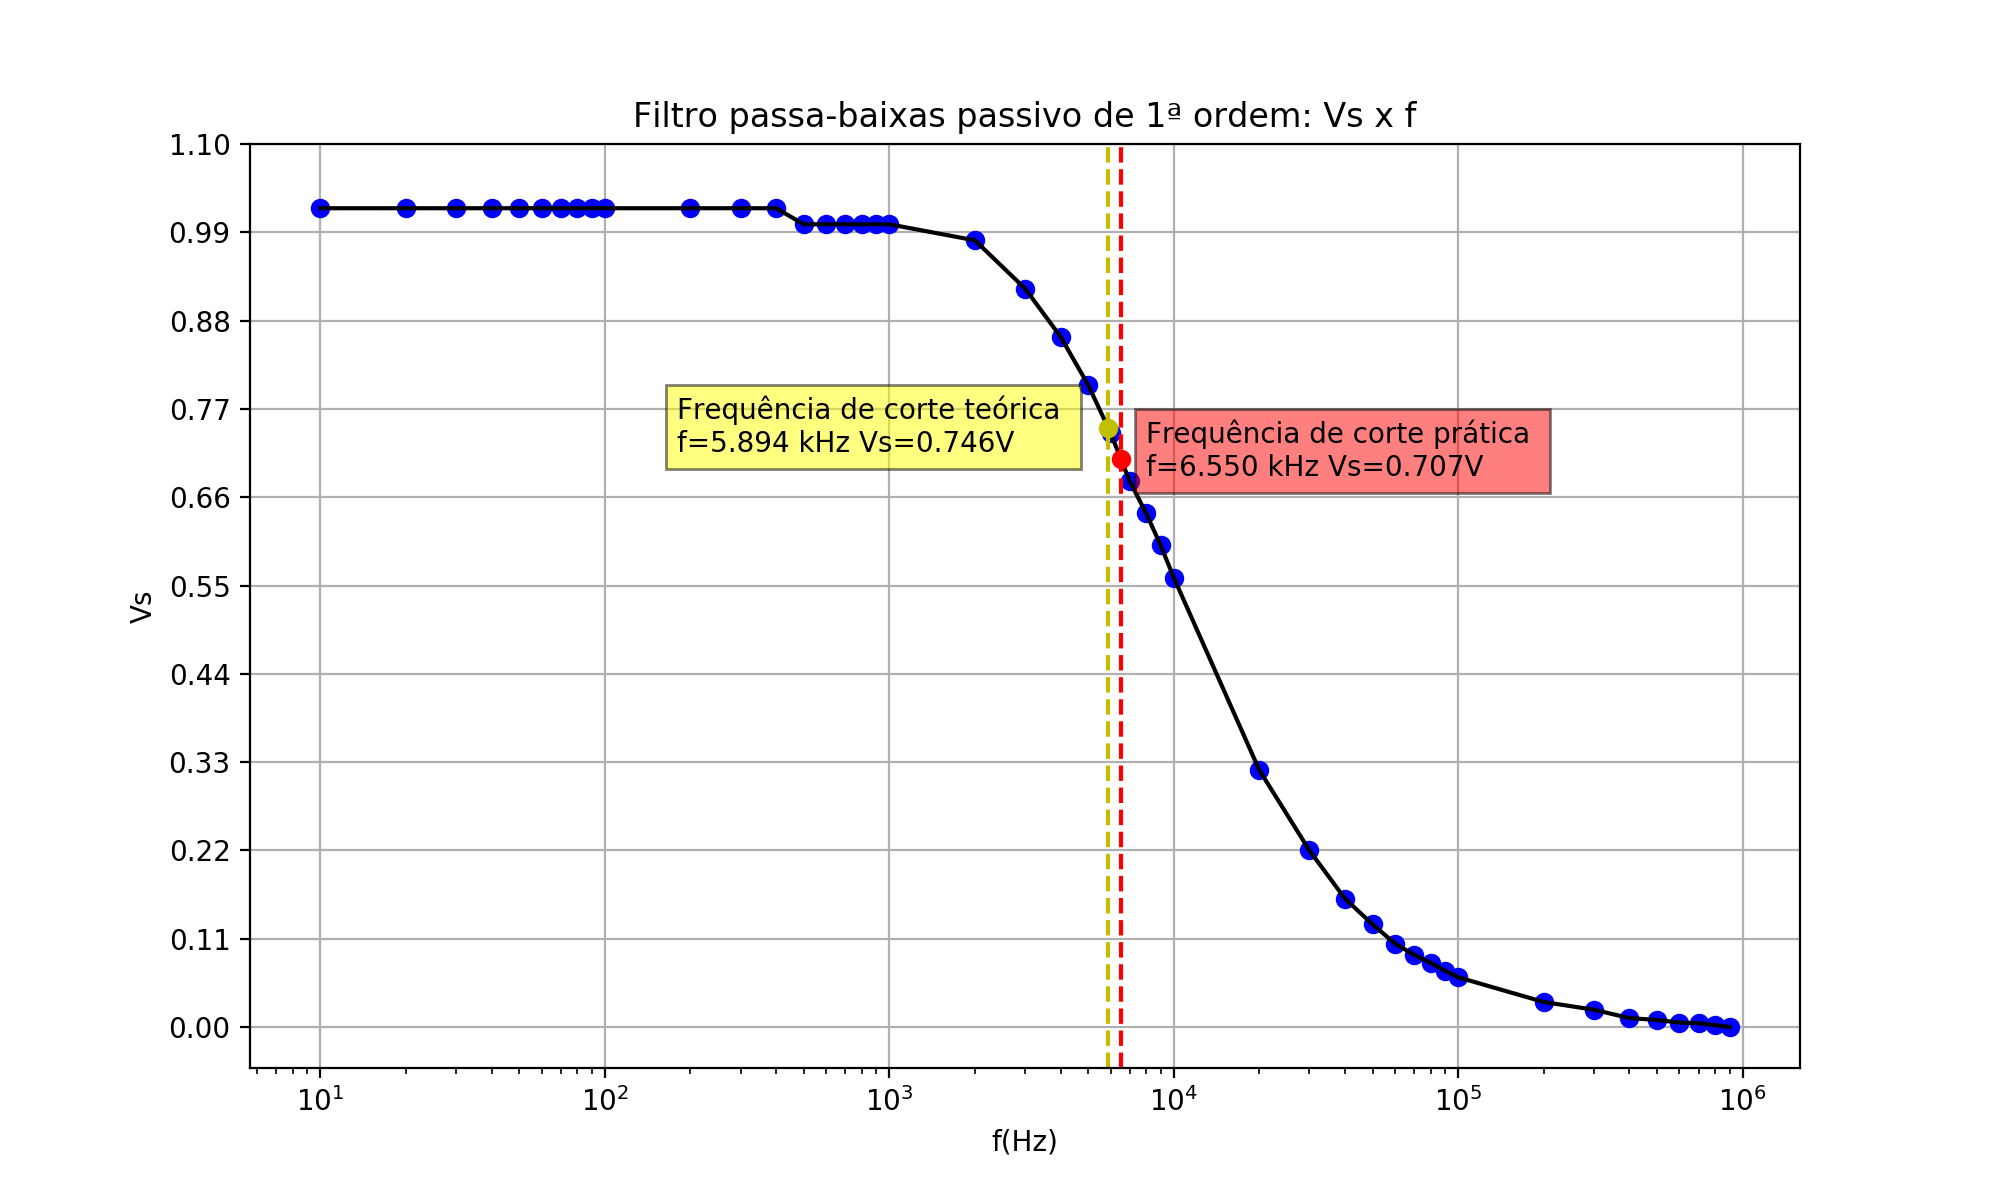

In [47]:
plt.figure(figsize=(10,6))
plt.plot(f, v, 'bo', f, v, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')

plt.plot(5894, 0.746, "oy")
plt.text(180, 0.7163, "Frequência de corte teórica \nf=%.3f kHz Vs=0.746V" %5.894,  bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvline(x=5894, color='y', linestyle='--')

plt.plot(6550, 0.707, "or")
plt.text(8000, 0.6863, "Frequência de corte prática \nf=%.3f kHz Vs=0.707V" %6.550,  bbox=dict(facecolor='red', alpha=0.5))
plt.axvline(x=6550, color='r', linestyle='--')

plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.yticks(np.linspace(0, 1.1, 11))
plt.grid()
plt.show()

## b) 

<IPython.core.display.Javascript object>


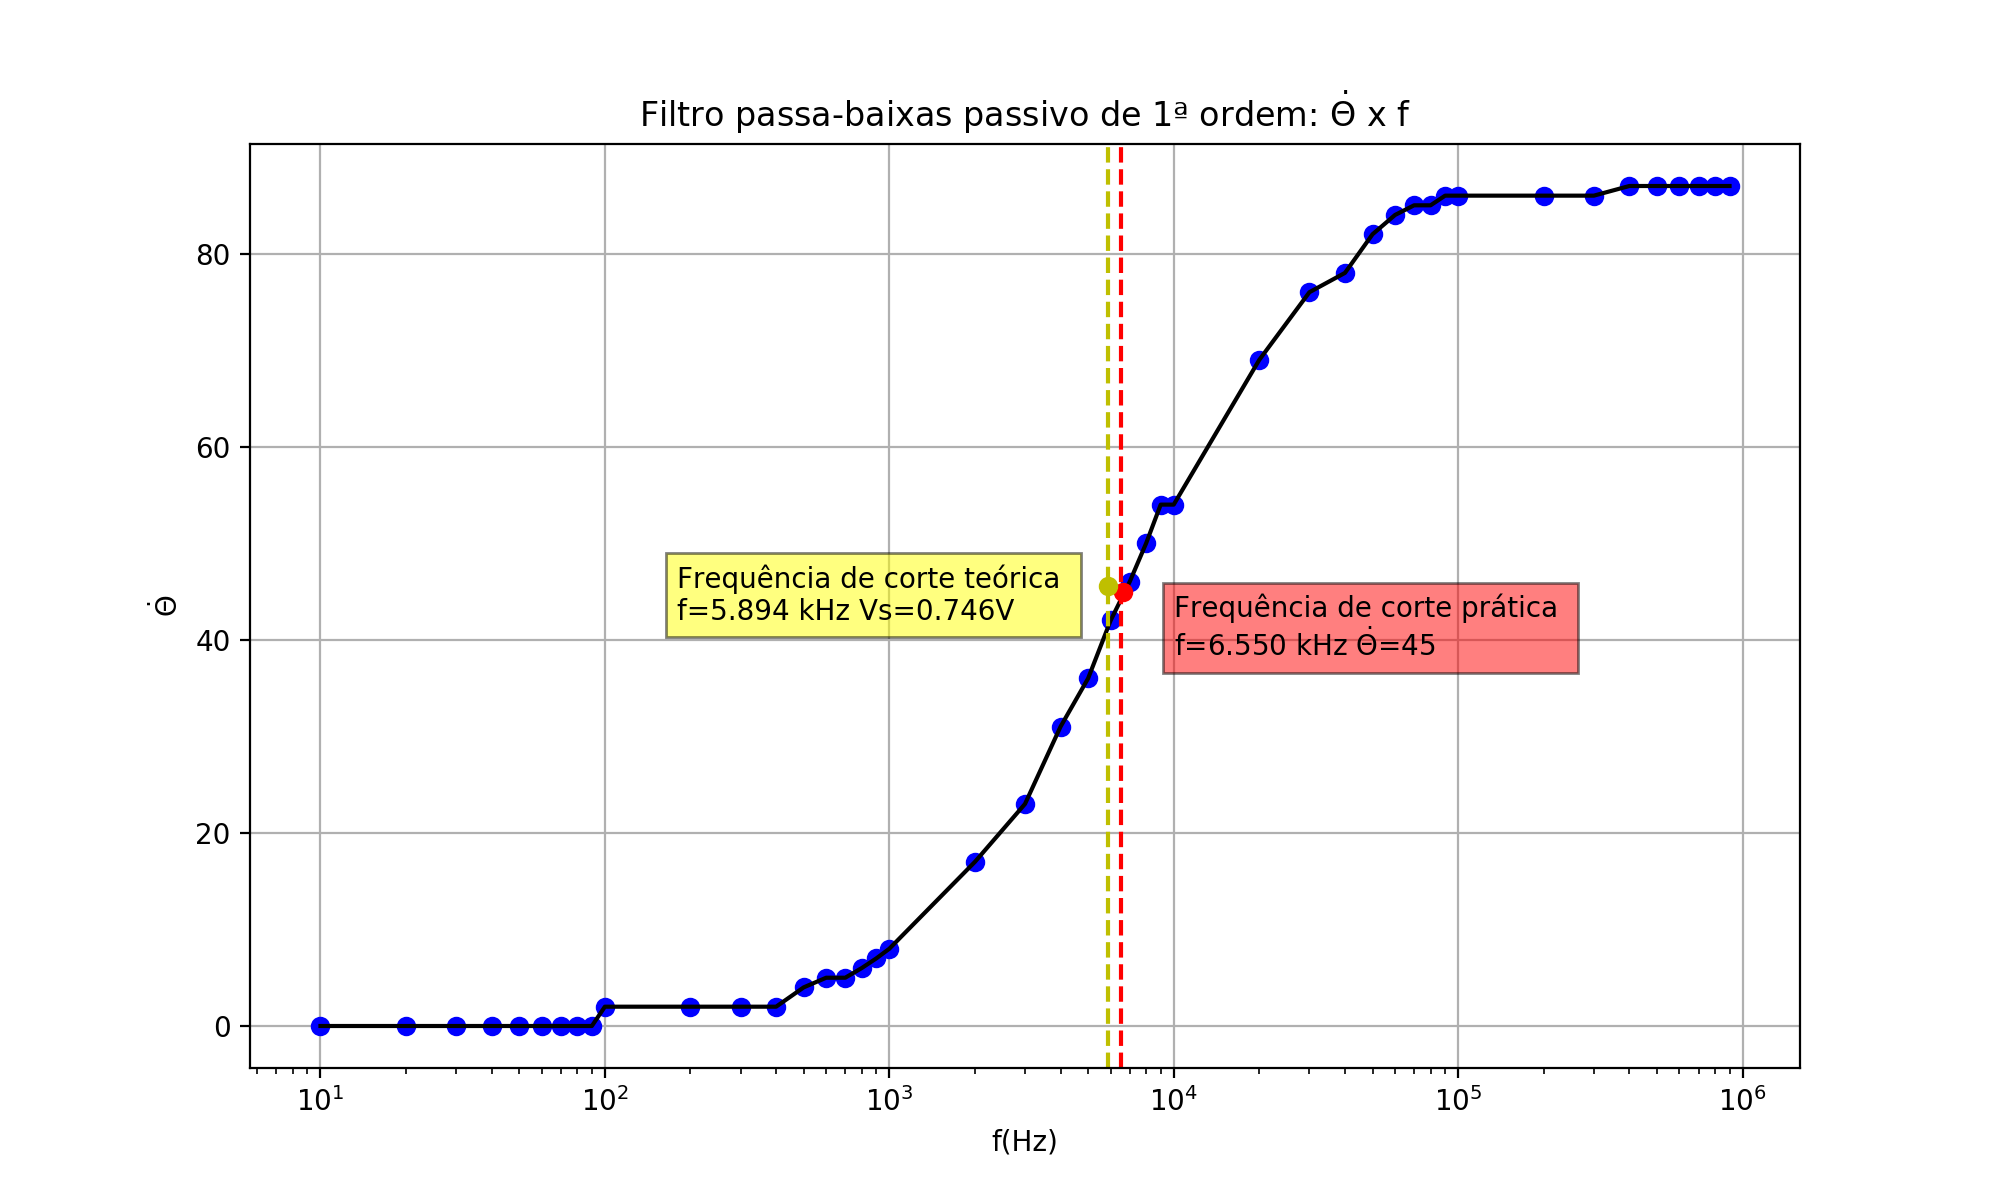

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(f, teta, 'bo', f, teta, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")

plt.plot(6650, 45, "or")
plt.axvline(x=6550, color='r', linestyle='--')
plt.text(10000, 38.364, "Frequência de corte prática \nf=%.3f kHz $\dot{\Theta}$=45" %6.550,  bbox=dict(facecolor='red', alpha=0.5))

plt.plot(5894, 45.576, "oy")
plt.text(180, 42, "Frequência de corte teórica \nf=%.3f kHz Vs=0.746V" %5.894,  bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvline(x=5894, color='y', linestyle='--')

plt.ylabel('$\dot{\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 4) A partir do gráfico da amplitude da resposta em frequência do filtro, determine as faixas de passagem, transição e atenuação.

<IPython.core.display.Javascript object>


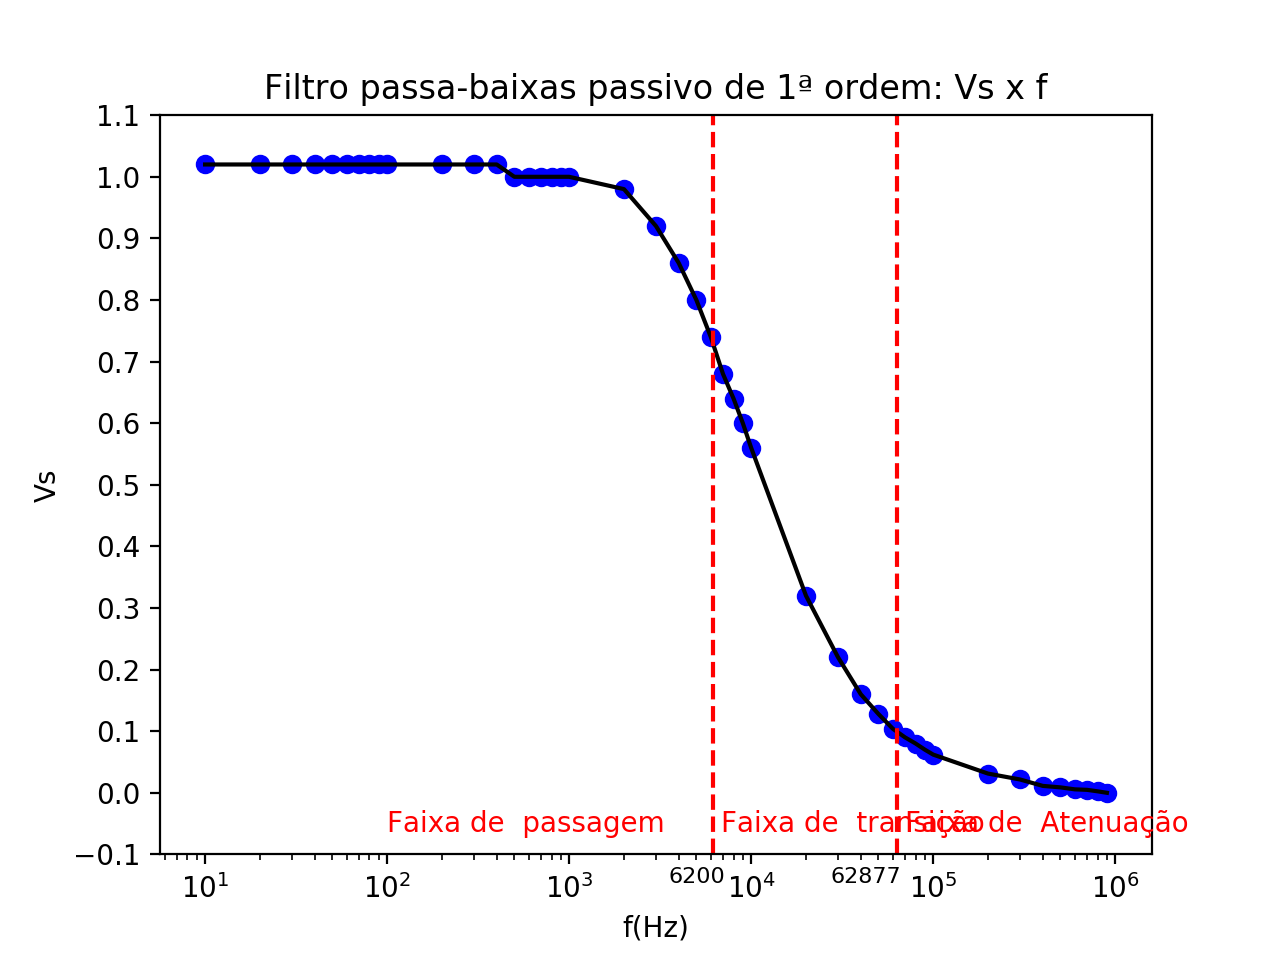

In [8]:

""" 
Ideia: pegar os dois pontos entorno do valor no eixo y e utilizar o processo de linearizaçao, 
    para com a eq da reta encontrar o a frequencia/valor correspondente no eixo x.
"""

plt.figure()
plt.plot(f, v, 'bo', f, v, 'k')
plt.axvline(x=6200, color='r', linestyle='--')
plt.axvline(x=62877, color='r', linestyle='--')
plt.xscale('log', nonposx='clip')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.text(100, -.05, 
         'Faixa de  passagem', fontsize=10, va='center', color='r')
plt.text(6800, -.05, 
         'Faixa de  transição', fontsize=10, va='center', color='r')
plt.text(70000, -.05, 
         'Faixa de  Atenuação', fontsize=10, va='center', color='r')

plt.text(5000, -0.12, ('%d' % 6200), fontsize=8, va='top', ha='center')
plt.text(42877, -0.12, ('%d' % 62877), fontsize=8, va='top', ha='center')

plt.yticks(np.linspace(-0.1, 1.1, 13))
plt.show()


## 5) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico do módulo do ganho de tensão do filtro em função da frequência. 


<IPython.core.display.Javascript object>


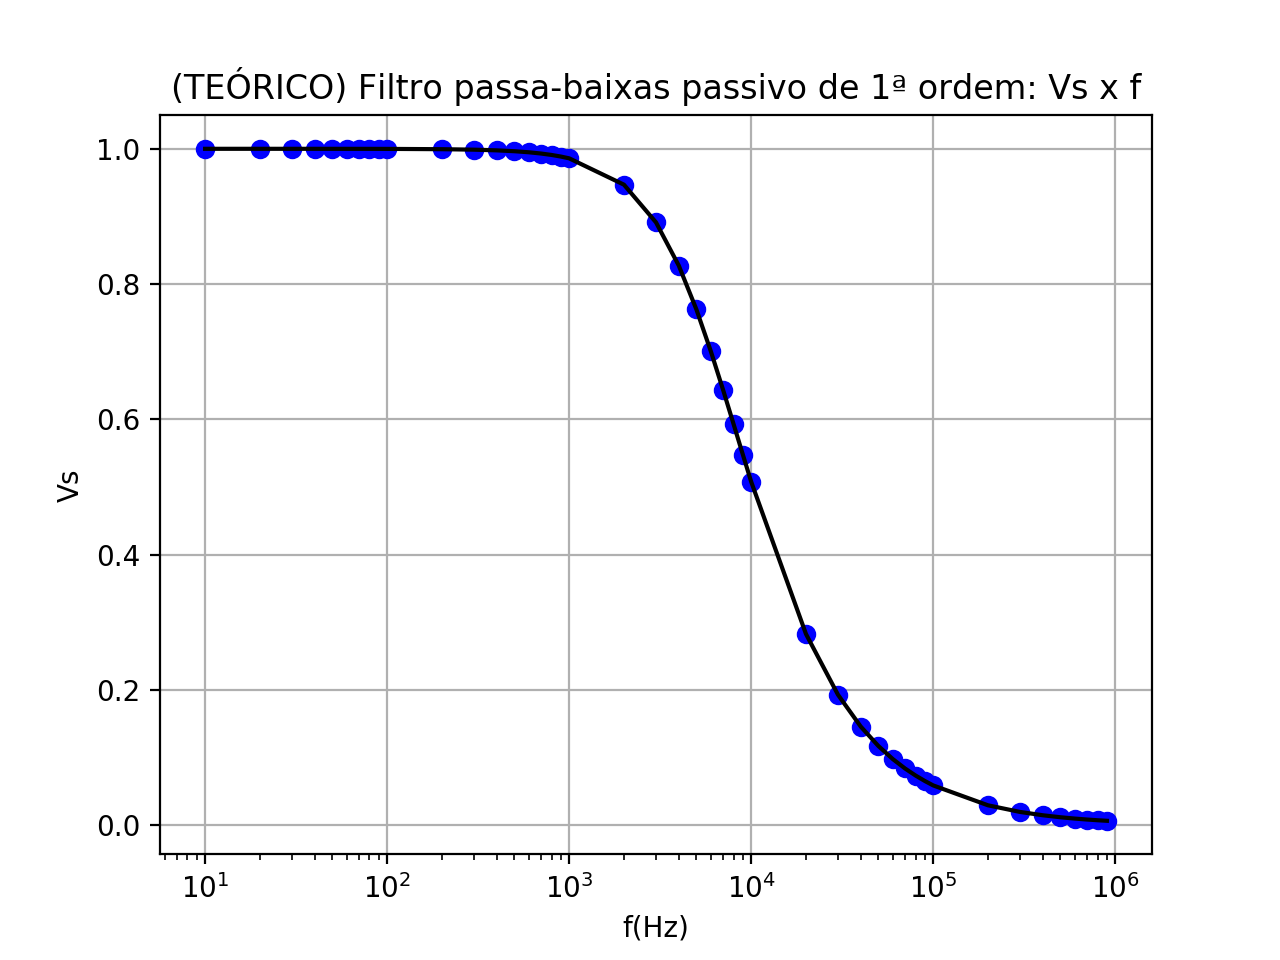

In [61]:
g = np.zeros(len(f))

def Av(fi): 
    return 1/math.sqrt(1 + (2 * math.pi * fi * R * C)**2)

for i in range(len(f)): 
    g[i] = Av(f[i])

plt.figure()
plt.xscale('log')
plt.plot(f, g,'bo', f, g,'k')
plt.title('(TEÓRICO) Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.plot(0,1)
plt.grid()
plt.show()

## 6) Compare o gráfico obtido na Questão 5 com o construído na Questão 1. 


---------------------------------- 
 Erro quadrático médio = 0.000518 
----------------------------------


<IPython.core.display.Javascript object>


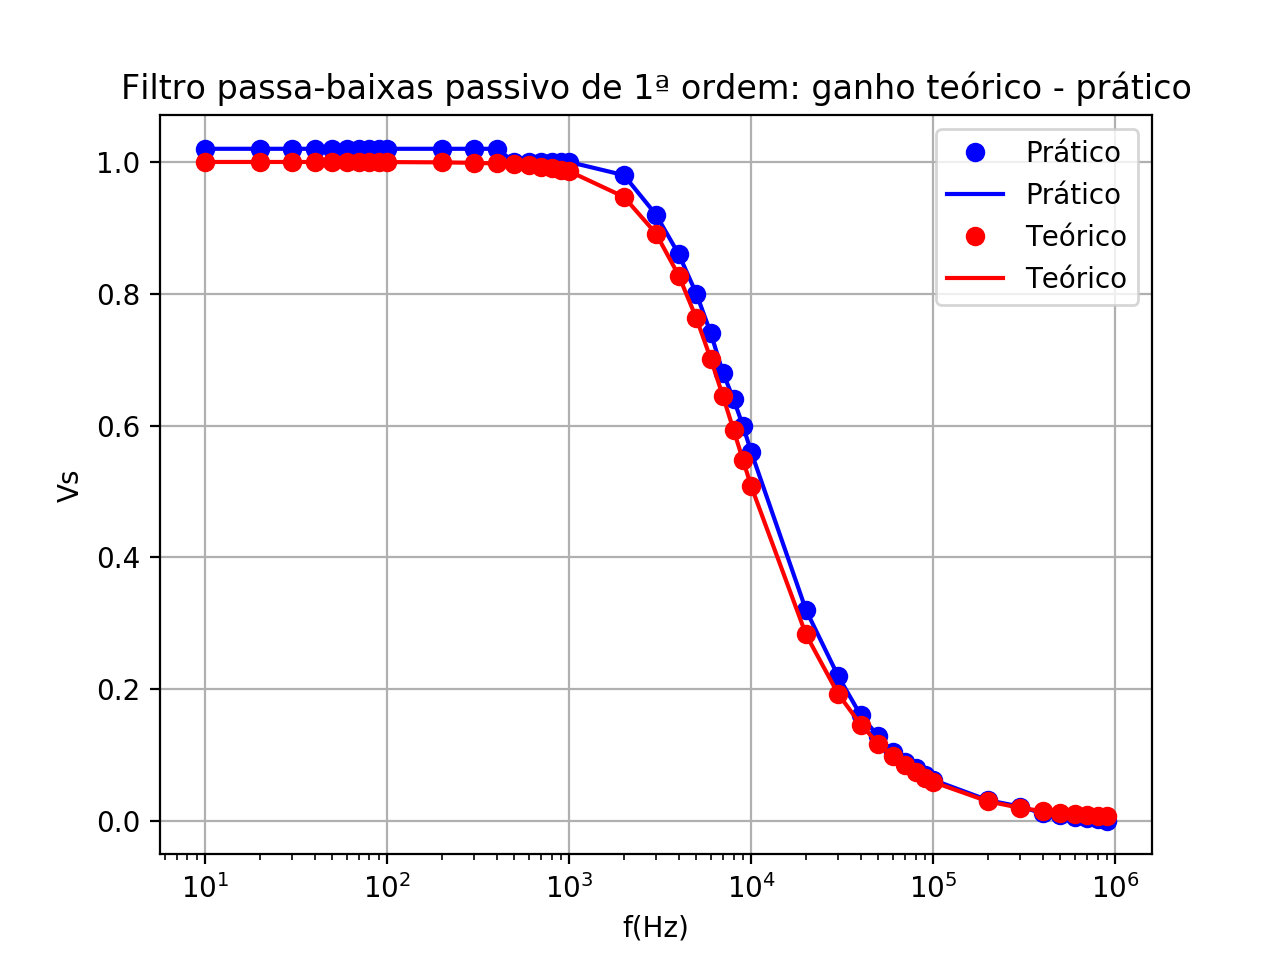

<IPython.core.display.Javascript object>


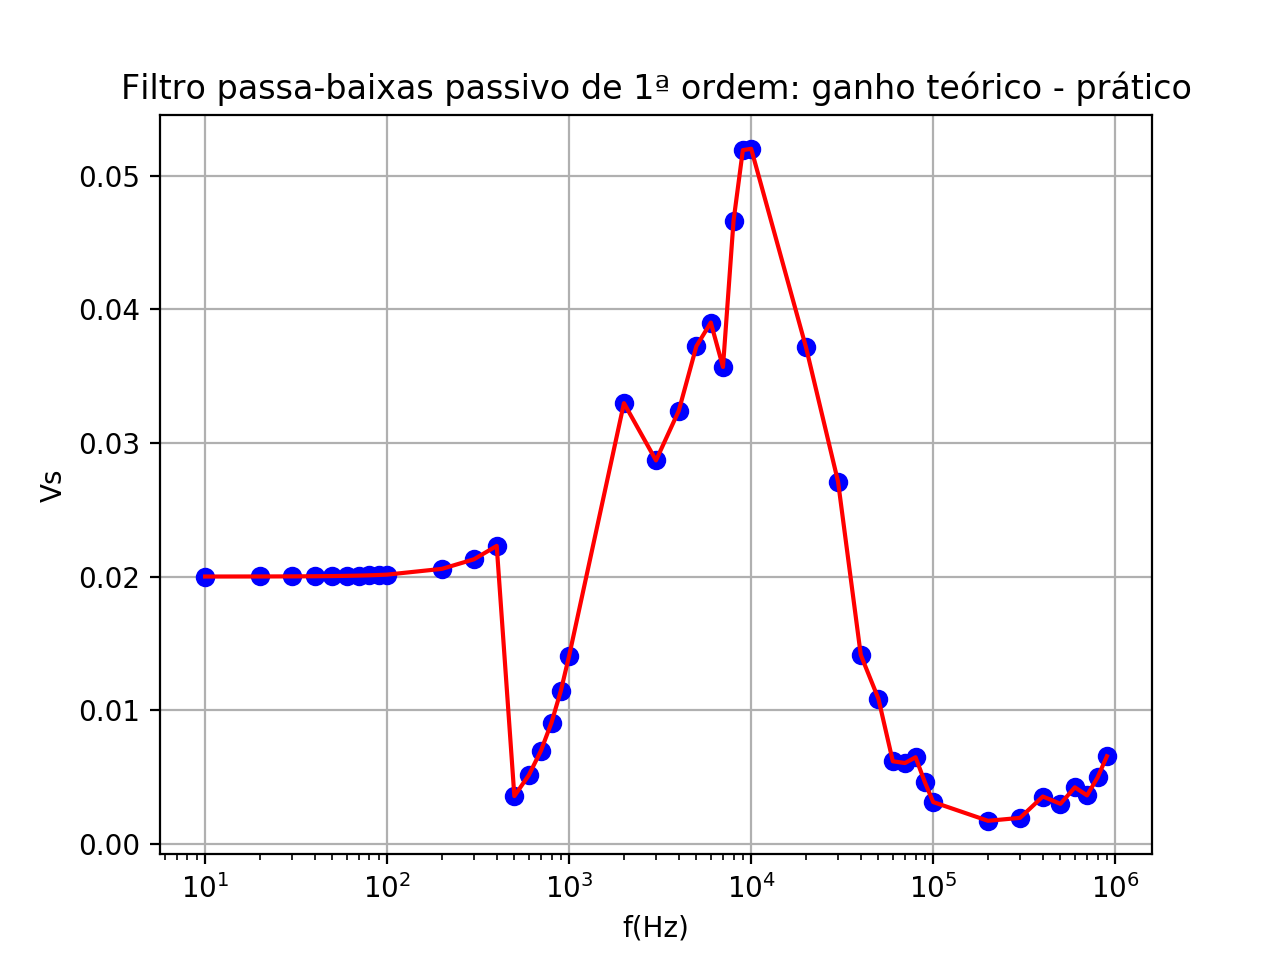

In [62]:
g = np.zeros(len(f))

def Av(fi): 
    return 1/math.sqrt(1 + (2 * 3.14 * fi * R * C)**2)

for i in range(len(f)): 
    g[i] = Av(f[i])

err = mean_squared_error(g, v)
print("---------------------------------- \n Erro quadrático médio = %f \n----------------------------------" %err)
diff = abs(v-g)

plt.figure()
plt.xscale('log')
plt.plot(f, v,'bo', f, v,'b', label="Prático")
plt.plot(f, g,'ro', f, g,'r', label="Teórico")
plt.title('Filtro passa-baixas passivo de 1ª ordem: ganho teórico - prático')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.xscale('log')
plt.plot(f, diff,'bo', f, diff,'r')
plt.title('Filtro passa-baixas passivo de 1ª ordem: ganho teórico - prático')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 7) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico da fase do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


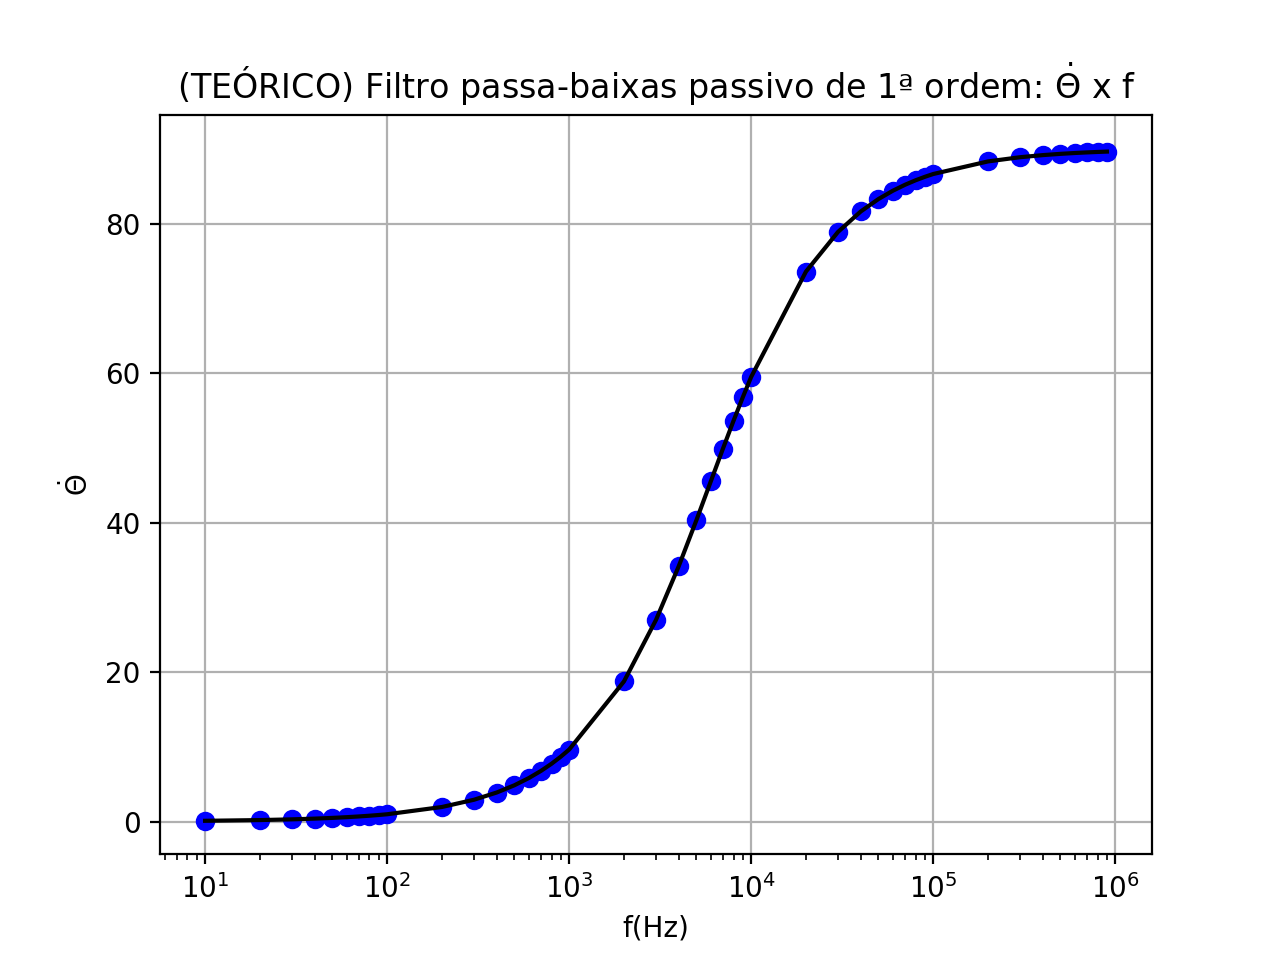

In [11]:
fase_Av = np.zeros(len(f))

def calcular_fase_Av(fi): 
    return math.degrees(math.atan(2*np.pi*fi*R*C)) 
    
for i in range(len(f)): 
    fase_Av[i] = calcular_fase_Av(f[i])


plt.figure()
plt.title(r"(TEÓRICO) Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")
plt.xscale('log')
plt.plot(f, fase_Av,'bo', f, fase_Av,'k')
plt.plot(0,90)
plt.ylabel(r"$\dot{\Theta}$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 8) Compare o gráfico obtido na Questão 7 com o construído na Questão 3. 

---------------------------------- 
 Erro quadrático médio = 5.367281 
----------------------------------


<IPython.core.display.Javascript object>


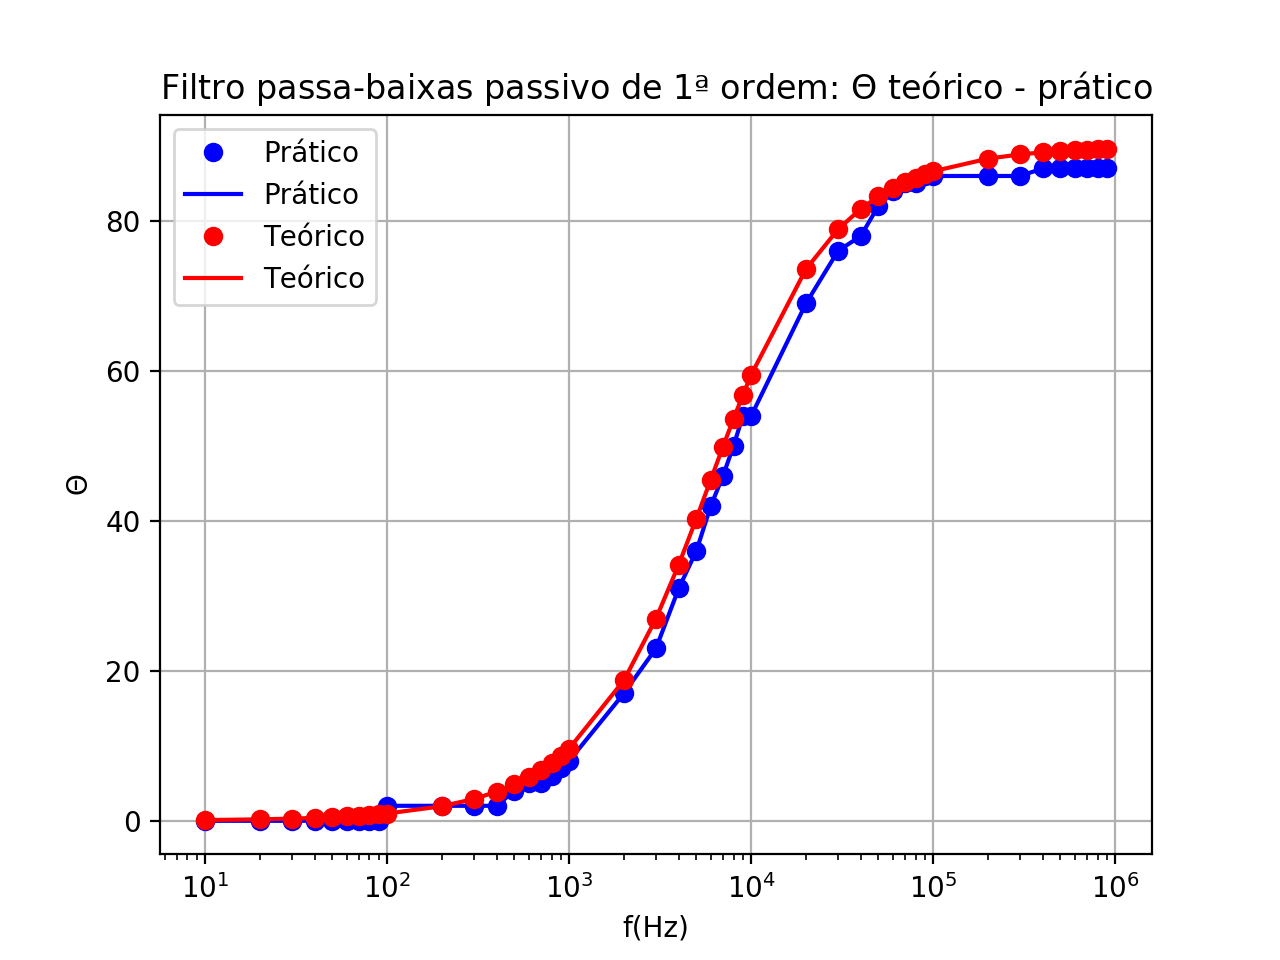

<IPython.core.display.Javascript object>


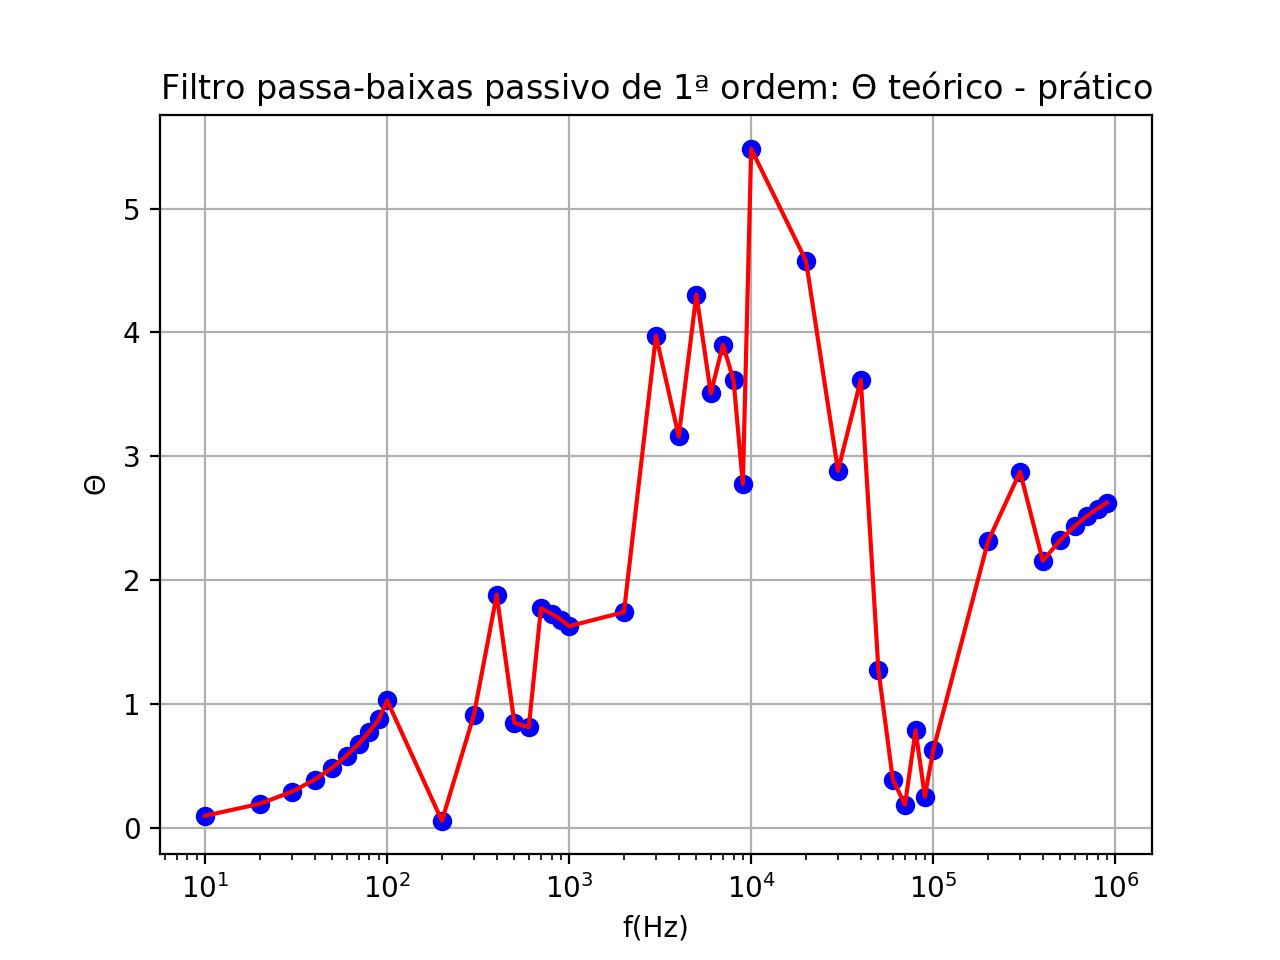

In [12]:
fase_Av = np.zeros(len(f))

def calcular_fase_Av(fi): 
    return math.degrees(math.atan(2*np.pi*fi*R*C)) 
    
for i in range(len(f)): 
    fase_Av[i] = calcular_fase_Av(f[i])
    

err = mean_squared_error(teta, fase_Av)
print("---------------------------------- \n Erro quadrático médio = %f \n----------------------------------" %err)
diff = abs(teta-fase_Av)

plt.figure()
plt.xscale('log')
plt.plot(f, teta,'bo', f, teta,'b', label="Prático")
plt.plot(f, fase_Av,'ro', f, fase_Av,'r', label="Teórico")
plt.title('Filtro passa-baixas passivo de 1ª ordem: ${\Theta}$ teórico - prático')
plt.ylabel('${\Theta}$')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.xscale('log')
plt.plot(f, diff,'bo', f, diff,'r')
plt.title('Filtro passa-baixas passivo de 1ª ordem: ${\Theta}$ teórico - prático')
plt.ylabel('${\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

# Filtro de Segunda Ordem 

In [66]:
R1 = 18e2
R2 = 18e3
C1 = 10e-9
C2 = 1e-9

In [67]:
v2 = [
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.98, 0.98, 0.98, 0.98, 0.98, 
        0.930, 0.860, 0.780, 0.720, 0.650, 0.580, 0.510, 0.488, 0.440, 0.180, 0.080, 
        0.064, 0.042, 0.040, 0.035, 0.033, 0.028, 0.025, 0.022, 0.002, 0.002, 0, 0, 0, 0, 0
    ]
f2 = [
        10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
         900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
         30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
         400000, 500000, 600000, 700000, 800000, 900000
    ]
teta2 = [
        0, 0,0, 0, 0, 0, 2, 2, 2, 2, 2, 4, 5, 7, 8, 10, 12, 12, 12, 25, 36, 48, 60, 
        65, 74, 78, 85, 92, 122, 140, 149, 150, 155, 164, 168, 170, 170, 172, 173, 
    ]

## 9.1) Com os valores anotados na Tabela 3, construa o gráfico do módulo do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


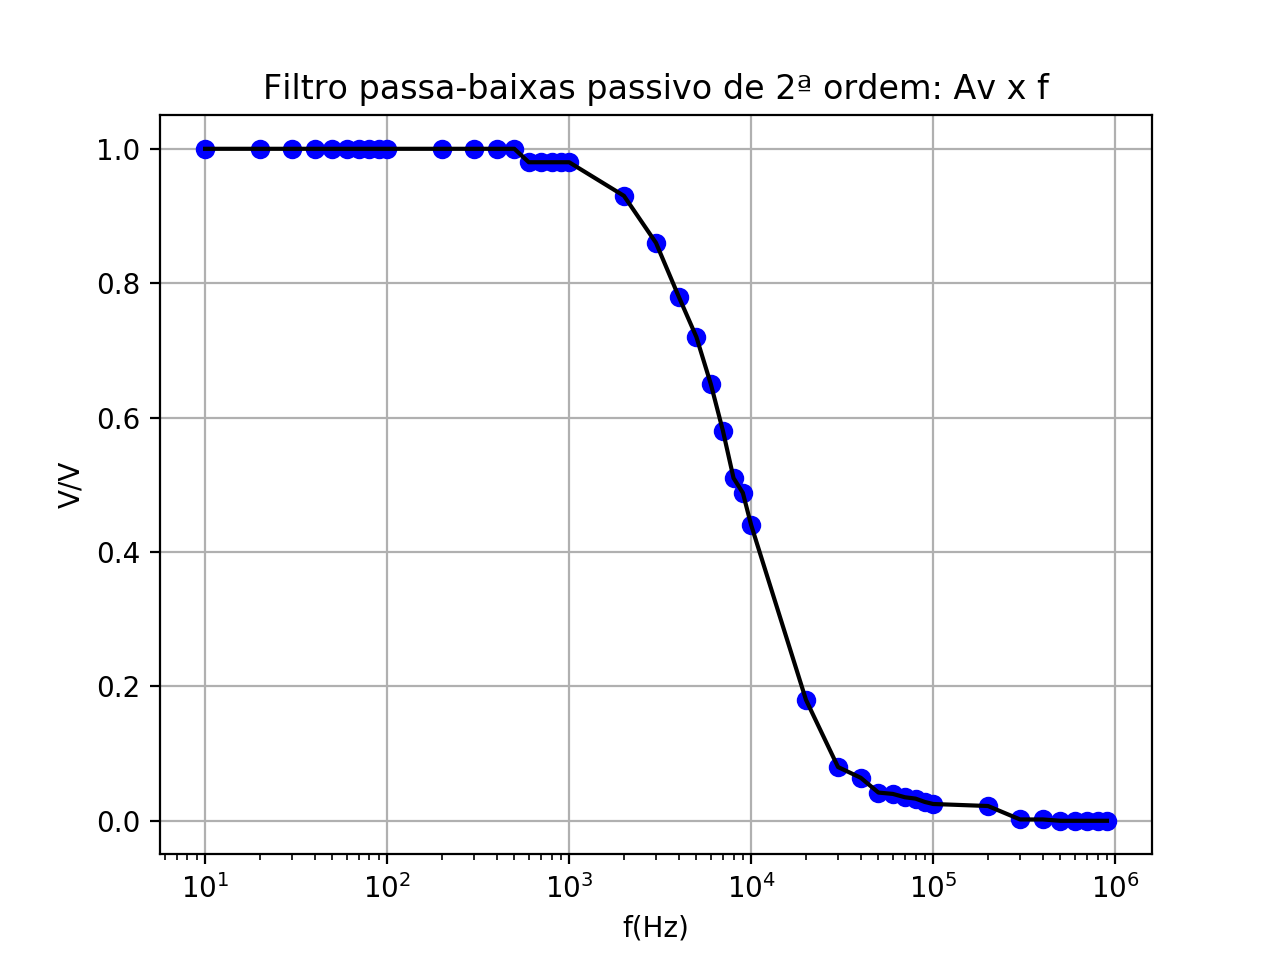

In [68]:
plt.figure()
plt.plot(f2, v2, 'bo', f2, v2, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 2ª ordem: Av x f')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 9.2) Com os valores anotados na Tabela 2, construa o gráfico do módulo da fase do filtro em função da frequência.

<IPython.core.display.Javascript object>


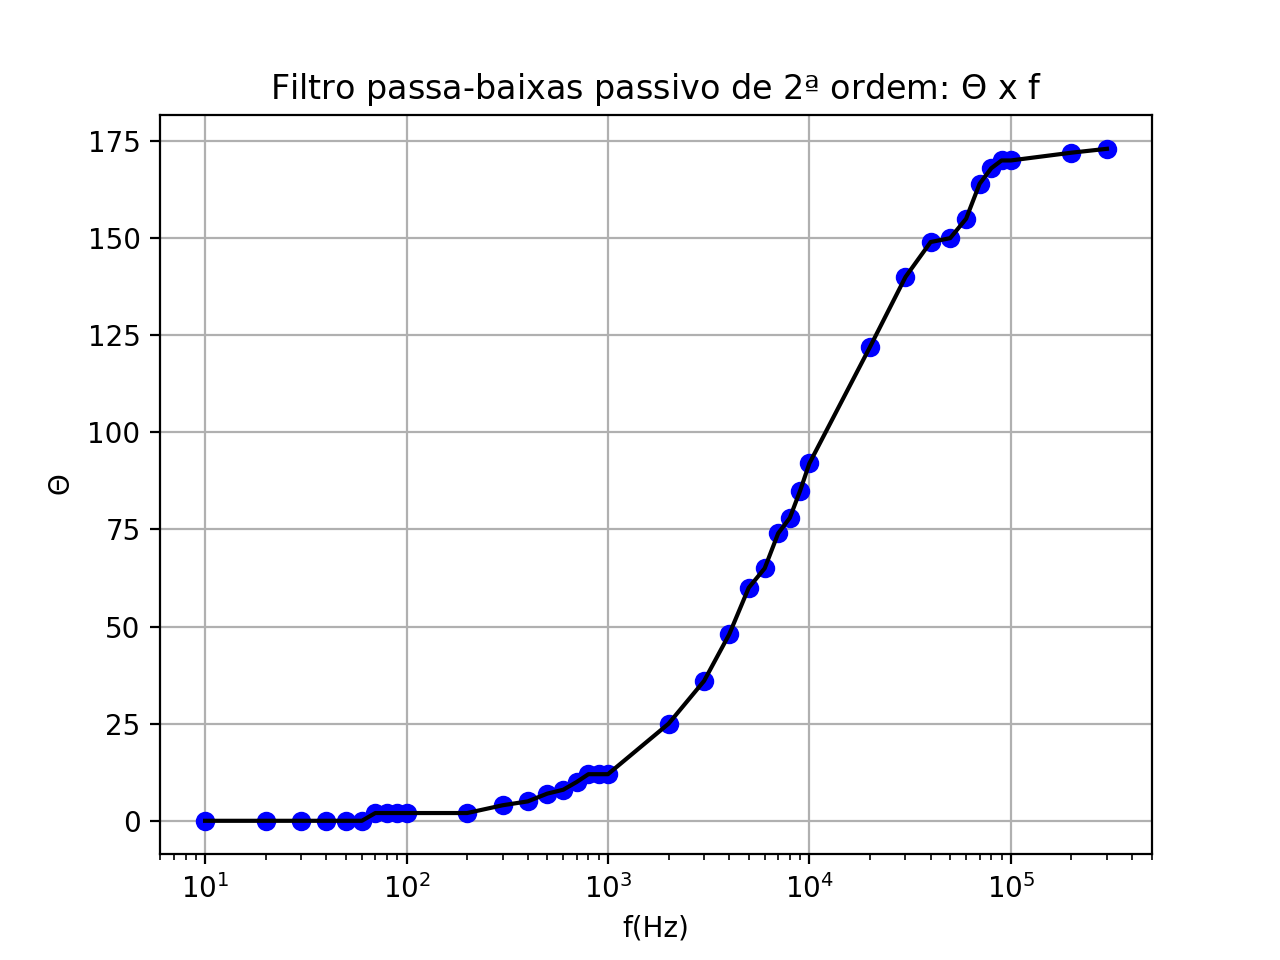

In [69]:
plt.figure()
plt.plot(f2[:-6], teta2, 'bo', f2[:-6], teta2, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 2ª ordem: ${\Theta}$ x f")
plt.ylabel('${\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 3) Calcule a frequência de corte do filtro montado na Parte Prática e indique-a nos gráficos construídos nas questões 1 e 3.

<IPython.core.display.Javascript object>


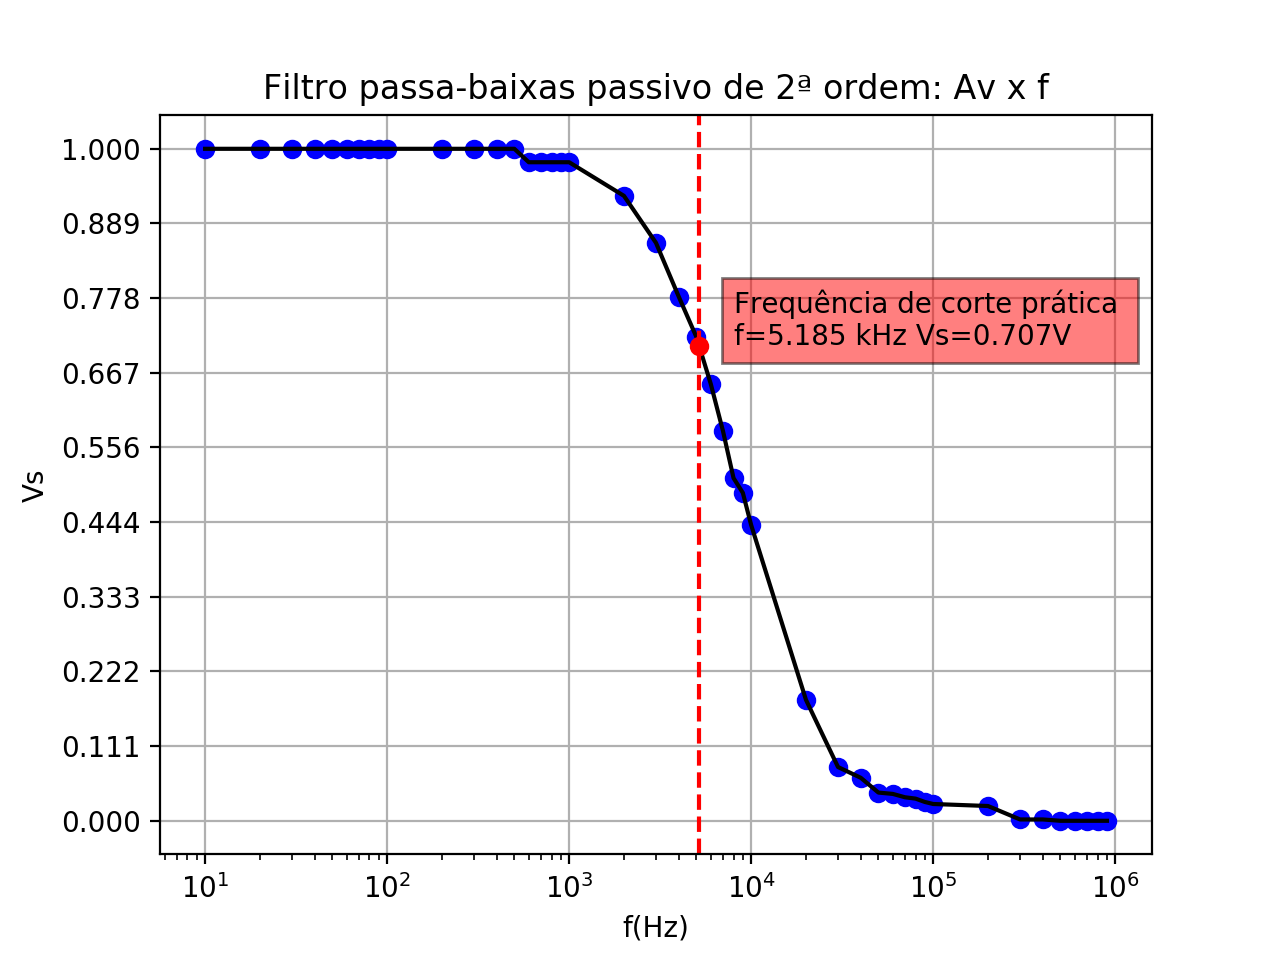

In [70]:
plt.figure()
plt.plot(f2, v2, 'bo', f2, v2, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 2ª ordem: Av x f')
plt.plot(5185, 0.707, "or")
plt.text(8000, 0.707, "Frequência de corte prática \nf=%.3f kHz Vs=0.707V" %5.185,  bbox=dict(facecolor='red', alpha=0.5))
plt.axvline(x=5185, color='r', linestyle='--')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.yticks(np.linspace(0, 1, 10))
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


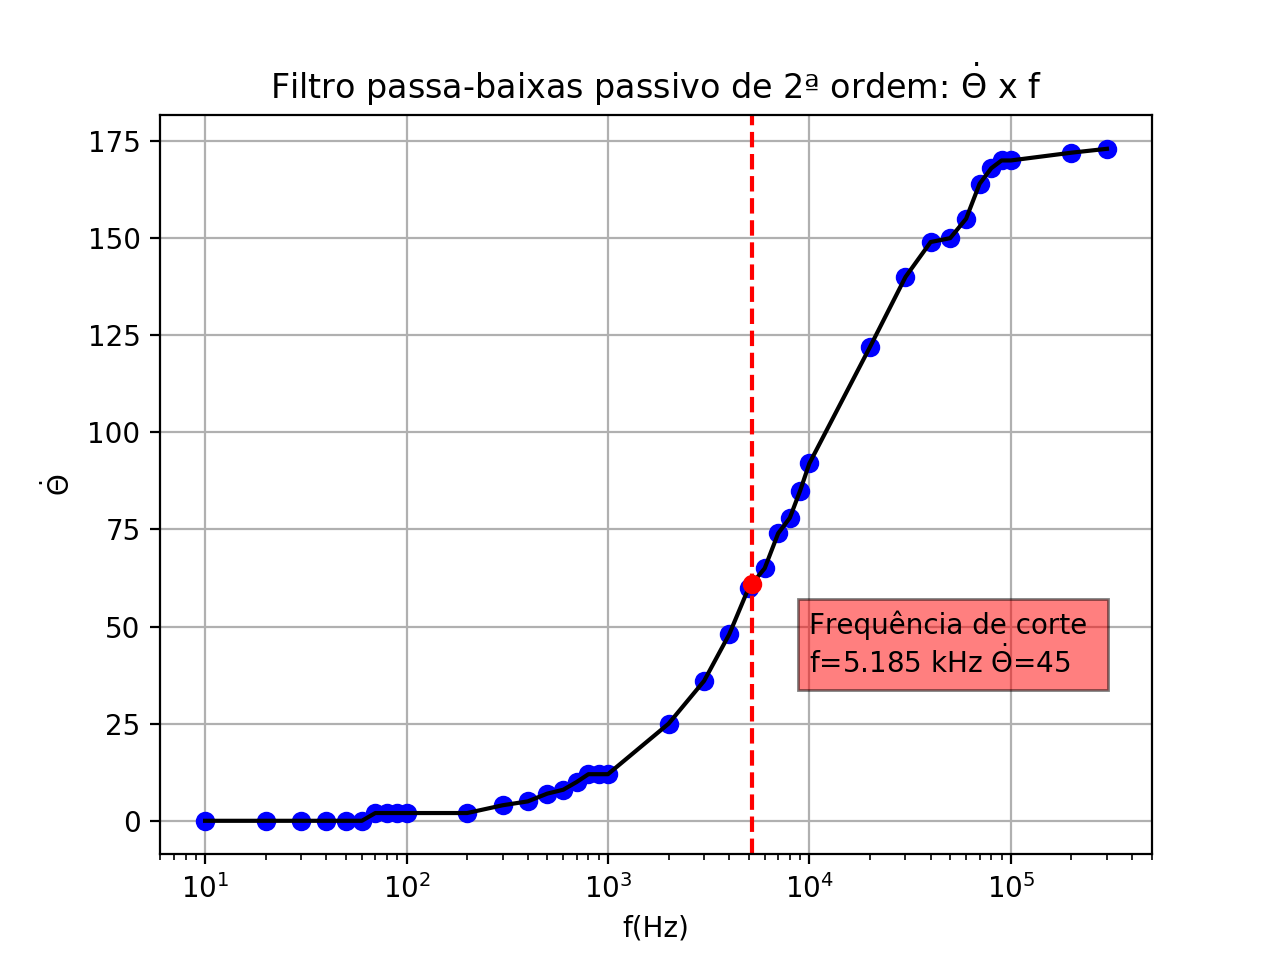

In [18]:
plt.figure()
plt.plot(f2[:-6], teta2, 'bo', f2[:-6], teta2, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 2ª ordem: $\dot{\Theta}$ x f")
plt.plot(5185, 61, "or")
plt.axvline(x=5185, color='r', linestyle='--')
plt.text(10000, 38.364, "Frequência de corte \nf=%.3f kHz $\dot{\Theta}$=45" %5.185,  bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel('$\dot{\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()


## 9.4) A partir do gráfico da amplitude da resposta em frequência do filtro, determine as faixas de passagem, transição e atenuação. 

## 9.5) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico do módulo do ganho de tensão do filtro em função da frequência.

[1.36847411e-03 2.73692634e-03 4.10533481e-03 5.47367763e-03
 6.84193294e-03 8.21007886e-03 9.57809352e-03 1.09459551e-02
 1.23136416e-02 1.36811314e-02 2.73404069e-02 4.09560774e-02
 5.45066060e-02 6.79707712e-02 8.13277678e-02 9.45573027e-02
 1.07639686e-01 1.20555916e-01 1.33287759e-01 2.47121187e-01
 3.29872555e-01 3.79833715e-01 4.02051874e-01 4.03993576e-01
 3.92686986e-01 3.73602385e-01 3.50566120e-01 3.26071907e-01
 1.46455242e-01 7.56687787e-02 4.51115740e-02 2.96925717e-02
 2.09431834e-02 1.55336522e-02 1.19670530e-02 9.49600859e-03
 7.71543816e-03 1.94802537e-03 8.67384930e-04 4.88218988e-04
 3.12553541e-04 2.17086315e-04 1.59507604e-04 1.22130771e-04
 9.65025924e-05]


<IPython.core.display.Javascript object>


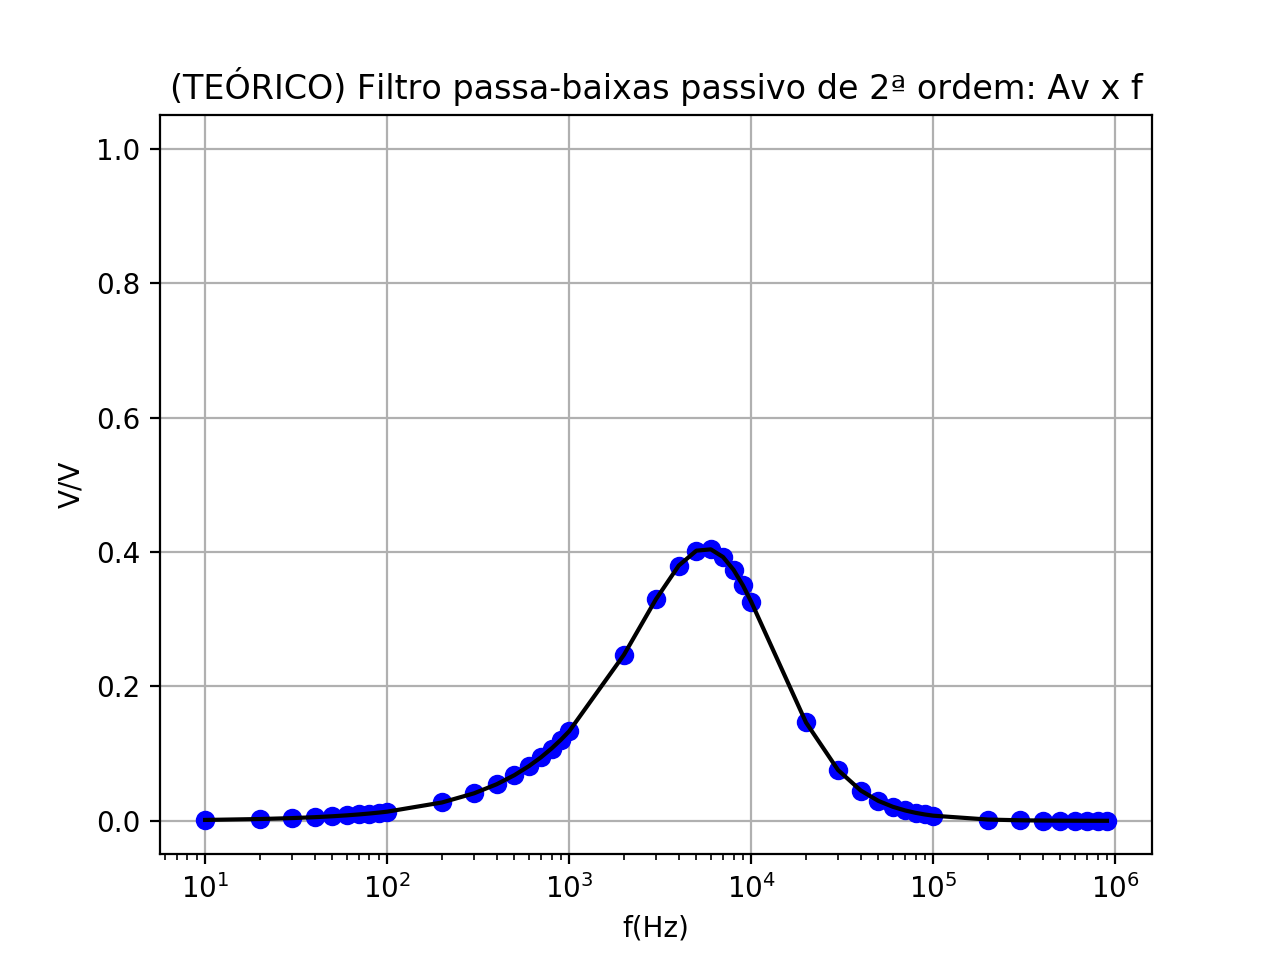

In [103]:
g2 = np.zeros(len(f))

def Av2(fi):
    s = 2*math.pi*fi*1j
    z1 = R1
    z2 = 1/(s*C1)
    z3 = R2
    z4 = 1/(s*C2)
    z34 = z3 + z4
    zeq = ((z34*z2)/(z34+z2))+z1
    
    return abs((1/zeq) * (((z1*z2)/(zeq)) * (z4/z34)))

for i in range(len(f)): 
    g2[i] = Av2(f2[i])

print(g2)
plt.figure()
plt.xscale('log')
plt.plot(f2, g2,'bo', f2, g2,'k')
plt.title('(TEÓRICO) Filtro passa-baixas passivo de 2ª ordem: Av x f')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.plot(0,1)
plt.grid()
plt.show()

## 9.6) Compare o gráfico obtido na Questão 9.5 com o construído na Questão 9.1.

## 9.7) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico da fase do ganho de tensão do filtro em função da frequência.

In [19]:
fase_2 = np.zeros(len(f))

def calcular_fase_Av(fi): 
    return math.degrees(math.atan(2*np.pi*fi*R*C)) 
    
for i in range(len(f)): 
    fase_Av[i] = calcular_fase_2(f[i])


plt.figure()
plt.title(r"(TEÓRICO) Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")
plt.xscale('log')
plt.plot(f, fase_2,'bo', f, fase_2,'k')
plt.plot(0,90)
plt.ylabel(r"$\dot{\Theta}$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

NameError: name 'calcular_fase_2' is not defined

## 9.8) Compare o gráfico obtido na Questão 9.7 com o construído na Questão 9.3.

## 10) Compare as respostas teóricas e experimentais da amplitude do ganho de tensão dos dois filtros.